# Lecture 21 - Classification and Regression; Linear Algebra

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt









#### Announcements:
* Week 4 survey themes

#### Goals
* Know the meaning of and distinction between classification and regression
* Be able to work with some of the basic objects and operations of linear algebra:
  * Vectors
  * Matrices
  * Dot product, transpose, addition, multiplication, (inverse, identity matrix)

## Prediction Tasks: Classification and Regression

So far we've mainly talked about exploratory analysis and descriptive techniques: looking for what is apparent from the data. Often, it's useful to use the insights available in data to make **predictions** about other data.

Generally, it can be useful to predict some quantity or property that cannot be measured (or cannot be measured ahead of time):

1. What is the current market value of a house?
2. Is a given email spam?
3. What percent of the vote will a given candidate get in an election?
4. How will a given person vote in an election?
5. Will someone who clicks on an ad buy a product?
6. What will be the market value of a stock one hour from now?
7. How many customers will eat at a restaurant next week?
8. Is a given sequence of requests to a website coming from a real humanm, or a DATA 311 student's Lab 5 (or other bot)?.
9. How could you most accurately fill in the NaN length measurements for each penguin?


Most prediction tasks fall into one of two categories: **classification** or **regression**. The basic distinction is whether you're trying to predict a **discrete categorical** property, or a **continuous numerical** property.
* Classification is the problem of predicting one of a discrete set of **labels**.
* Regression is the problem of predicting a **real number**

**Exercise**: *Classify* each of the above 9 prediction problems by determining whether it is a **classification** problem or a **regression** problem.

In [3]:
p = sns.load_dataset('penguins')
p

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

**Exercise**: Consider flipper length and body mass. Suppose it's easier to put a penguin on a scale than to pin it down and measure its flipper with a measuring tape. Come up with a scheme to predict flipper length given only body mass. *Note*: no fancy "linear regression" allowed - tell me a scheme in terms an 8th grader could understand!

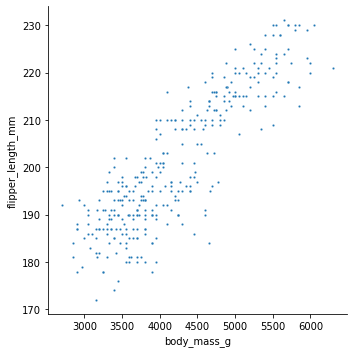

In [42]:
sns.relplot(x="body_mass_g", y="flipper_length_mm", s=5, data=p)

**Exercise:** Suppose we want to predict a penguin's species based on its body mass and flipper length. Describe a scheme for doing this.

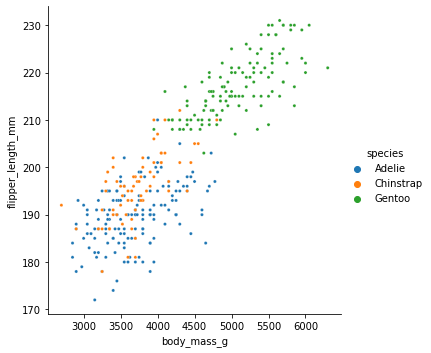

In [54]:
sns.relplot(x="body_mass_g", y="flipper_length_mm", hue="species", s=10, data=p)

**Exercise:** Suppose we want to predict a penguin's species based on its bill length and depth. Describe a scheme for doing this.

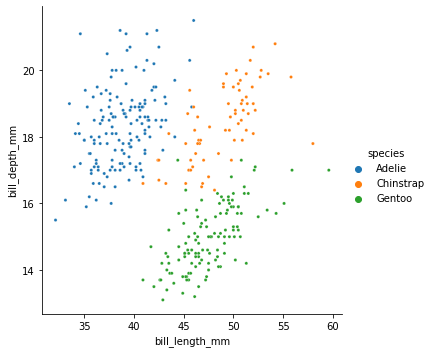

In [55]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", s=10, hue="species", data=p)

## Linear Algebra

Any classification and regression problem can be cast in terms very similar to those above. The number of variables you're basing your prediction on may change, but that doesn't fundamentally change the problem.

While there are many schemes for classification and regression, many of the most commonly used ones are all built on top of **linear models**. This means a few things:
* The regressed value $y$ is a linear function of the input variables ($x_1 \ldots x_d$).
$$ y = c_0 + c_1 x_1 + \ldots + c_d x_d$$
* The **predicted probability** of a given class is a linear function of the input variables.
$$ p(Y=y) = c_0 + c_1 x_1 + \ldots + c_d x_d$$
where $c_i$ are some coefficients that we may need to figure out from the data.

It may not seem so at first, but the natural language to talk about these models (and most of the fancier ones built on top of them) is **linear algebra**, because linear functions are very naturally represented using matrices.

### Linear Algebra - The Basics

* Vectors
    * notation, dimensions
    * column (default), row
    * dot product (relation to correlation/covariance)

**Exercise**: Compute the dot product: 
$$\begin{bmatrix}1 \\ 2 \\ 3\end{bmatrix} \cdot \begin{bmatrix}6 \\ 3 \\ 0\end{bmatrix}$$

**Exercise**: Given a vector $v$, write an expression that represents the **sum** of the **squares** of its elements.

#### Matrices
* notation, dimensions
* transpose
* addition
* matrix-vector multiplication
    * element view
    * column view
    * row view
    * dimension transformation machine view

**Exercise**: In non-mathematical terms, what does the following matrix do when multiplied by a given 3-vector?
$$\begin{bmatrix}0 & 0 & 1\\ 0 & 1 & 0 \\ 1 & 0 & 0\end{bmatrix}$$


* matrix-matrix multiplication

**Exercise**: For each of the following, say whether there's a dimension mismatch; if not, give the dimensions of the result.

* $A_{200 \times 200} \hspace{.2em} x_{200 \times 1}$
* $A_{2 \times 3} \hspace{.2em} B_{3 \times 7} \hspace{.2em} x_{7 \times 1}$
* $A_{200 \times 300} \hspace{.2em} B_{200 \times 300} \hspace{.2em} C_{300 \times 4}$
* $(A_{200 \times 300} \hspace{.2em})^T B_{200 \times 300} \hspace{.2em} C_{300 \times 4}$


**Exercise**: Write the dot product of two column vectors $v_1$ and $v_2$ as a matrix multiplication.

**Exercise**: In non-mathematical terms, what does the following matrix do when multiplied by a given 3-vector?
$$\begin{bmatrix}1 & 0 & 0\\ 0 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}$$


Square matrices only:
* identity
* inverse

**Exercise**: Find a way to rewrite the following regression model using matrix notation:
$$ y = c_0 + c_1 x_1 + \ldots + c_d x_d$$